# Lesson 6 Assignment - Advertising Sales Regression

## Author - Shuyang Ren




### Instructions  
Perform four different linear regressions on advertising sales data located in 'Advertising.csv'.  Your dependent feature is 'sales', a measure of sales of a product in a given market in thousands of dollars. 

The independent features for each of the first 3 separate regressions are:

 1. 'TV': advertising dollars spent on TV ads for a single product in a given market
 2. 'radio': advertising dollars spent on radio ads
 3. 'newspaper': advertising dollars spent on newspaper ads

For the first 3 linear regression performed:

- Produce a labeled graph showing the best fit line with the data points.
- Interpret both the slope and y-intercept.
 
The final regression(#4) includes all 3 features: (a) TV, (b) radio, and (c) newspaper. 
- Interpret each partial slope and the intercept parameters.
- Interpret the adjusted R-squared.
- Find and report the mean-squared error.

#### Please prepare this information for a client who may not understand what the parameters mean.


In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.formula.api as sm
import seaborn as sns
%matplotlib inline

In [2]:
# Load data
filename = 'https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/Advertising.csv'
ad = pd.read_csv(filename, index_col=0)
ad.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Text(0.5, 1.0, 'Scatter-plot of Tv ad spending vs Sales')

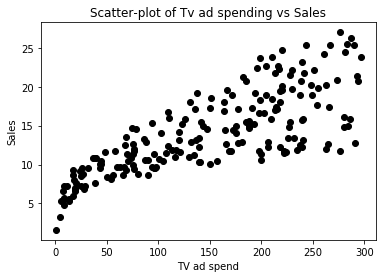

In [3]:
plt.plot(ad['TV'], ad['sales'], 'ko')
plt.xlabel('TV ad spend')
plt.ylabel('Sales')
plt.title('Scatter-plot of Tv ad spending vs Sales')

In [4]:
# We see a positive correlation between TV ad spendings at Sales. Looks appropraite to do linear regession

In [5]:
col = ['TV', 'radio', 'newspaper']
linear_model = linear_model.LinearRegression()

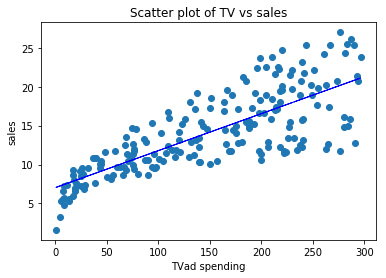

Intercept: 7.032593549127693
Slope : 0.047536640433019764


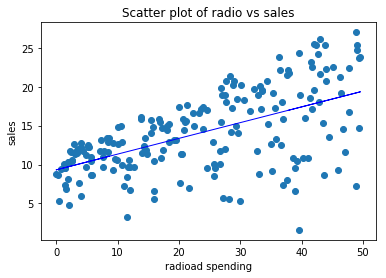

Intercept: 9.311638095158283
Slope : 0.20249578339243968


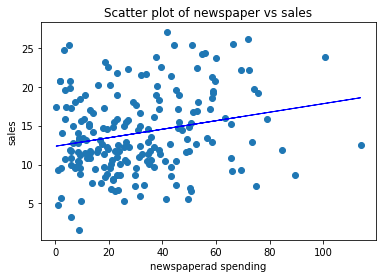

Intercept: 12.35140706927816
Slope : 0.05469309847227336


In [6]:
for column in col:
    x_input = ad[column].values.reshape(200, 1)
    y_output = ad['sales'].values.reshape(200, 1)
    linear_model.fit(x_input, y_output)
    y_pred = linear_model.predict(x_input)
    plt.scatter(x_input, y_output)
    plt.plot(x_input, y_pred, linewidth = 1, color = "blue")
    plt.xlabel(column + "ad spending")
    plt.ylabel('sales')
    plt.title('Scatter plot of ' + column + ' vs sales')
    plt.show()
    print('Intercept: ' + str(linear_model.intercept_[0]))
    print('Slope : ' + str(linear_model.coef_[0][0]))

For the first plot, the y- intercept indicates that with no TV ad spending the estimated sales is 7.033. The slope indicates that for every additional unit of TV ad spending, the estimated sales increase by 0.048 units

For the second plot, the y- intercept indicates that with no Raido spending the estimated sales is 9.312. The slope indicates that for every additional unit of Radio ad spending, the estimated sales increases by 0.203 units.

For the third plot, the y- intercept indicates with no newspaper ad spending the estimated sales is 12.351 units. The slope indicates that for every additional unit of Newspaper ad spending, the estimated sales increases by 0.055 units.

Intercept / slope: Intercept    2.938889
radio        0.188530
tv           0.045765
newspaper   -0.001037
dtype: float64
SSE: 4860.323487097813
SST: 5417.14875
SSR: 556.8252629021872
RMSE: 40.250563089633964
mean square error: 5.217456565710478
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 21 Apr 2019   Prob (F-statistic):           1.58e-96
Time:                        20:31:28   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust      

Text(0.5, 1.0, 'Residual Histogram')

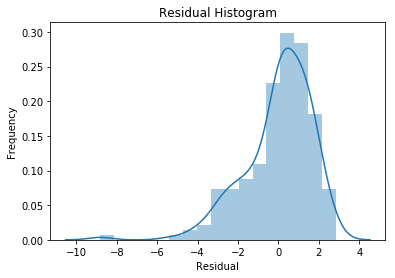

In [15]:
tv = ad['TV'].values.reshape(200, 1)
newsy = ad['newspaper'].values.reshape(200, 1)
radio = ad['radio'].values.reshape(200, 1)
x_input = tv + radio + newsy
y_output = ad['sales'].values.reshape(200, 1)
ols_model = sm.ols(formula = 'sales ~ radio + tv + newspaper', data = ad)
results = ols_model.fit()

# various statstics
print('Intercept / slope: ' + str(results.params))
mean_y = np.mean(y_output)
sst = np.sum((y_output - mean_y)**2)
sse = sst - results.ssr
print('SSE: ' + str(sse))
print('SST: ' + str(sst))
print('SSR: ' + str(results.ssr))
print('RMSE: ' + str(np.sqrt(results.mse_model)))
print('mean square error: ' + str(np.sqrt(results.mse_total)))
print(results.summary())

# residuals
sns.distplot(results.resid, hist=True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram')

At the intercept of  2.938889, this is the predicted sales with out spending any on advertising. Among the partial slopes we can see that radio seems to be the most effective in increasing sales per unit of spending (since it has the greatest slope). With an adjusted R-squared value of .896, we are confident in the robustness of our model and its explanatory power (89.6% of the variability can be explained by the model). Lastly, as requested, the mean square error is 5.217456565710478.